## vital extraction

In [5]:
import vitaldb
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt


# define variables
SRATE = 100

# tracks to extract / VENT_SET_TV -> VENT_INSP_TM
track_names = ["SNUADC/ECG_II", "SNUADC/PLETH", "Solar8000/VENT_INSP_TM", "Orchestra/PPF20_CE", "Orchestra/RFTN20_CE"]

# create saving folder
file_path = "vital_np2"
if not os.path.exists(file_path):
    os.mkdir(file_path)


cnt = 0
for caseid in list(vitaldb.caseids_tiva)[:]:
    cnt = cnt + 1
    print(f'{cnt}/{len(vitaldb.caseids_tiva)}')
    vf = vitaldb.VitalFile(caseid, track_names)
    #vf.to_vital(f"{caseid}.vital")
    vals = vf.to_numpy(track_names, interval=1/SRATE)

    
    # saving files
    filename = f'{file_path}/{caseid}.npz'
    np.savez(filename, ECG=vals[:,0], PPG=vals[:,1], INTU=vals[:,2], PPF=vals[:,3], RFTN=vals[:,4])

1/2765
2/2765
3/2765
4/2765
5/2765
6/2765
7/2765
8/2765
9/2765
10/2765
11/2765
12/2765
13/2765
14/2765
15/2765
16/2765
17/2765
18/2765
19/2765
20/2765
21/2765
22/2765
23/2765
24/2765
25/2765
26/2765
27/2765
28/2765
29/2765
30/2765
31/2765
32/2765
33/2765
34/2765
35/2765
36/2765
37/2765
38/2765
39/2765
40/2765
41/2765
42/2765
43/2765
44/2765
45/2765
46/2765
47/2765
48/2765
49/2765
50/2765
51/2765
52/2765
53/2765
54/2765
55/2765
56/2765
57/2765
58/2765
59/2765
60/2765
61/2765
62/2765
63/2765
64/2765
65/2765
66/2765
67/2765
68/2765
69/2765
70/2765
71/2765
72/2765
73/2765
74/2765
75/2765
76/2765
77/2765
78/2765
79/2765
80/2765
81/2765
82/2765
83/2765
84/2765
85/2765
86/2765
87/2765
88/2765
89/2765
90/2765
91/2765
92/2765
93/2765
94/2765
95/2765
96/2765
97/2765
98/2765
99/2765
100/2765
101/2765
102/2765
103/2765
104/2765
105/2765
106/2765
107/2765
108/2765
109/2765
110/2765
111/2765
112/2765
113/2765
114/2765
115/2765
116/2765
117/2765
118/2765
119/2765
120/2765
121/2765
122/2765
123/2765
1

## input

In [6]:
# create saving folder
file_path = "vital_np2"
save_path = "input_60s"
if not os.path.exists(save_path):
    os.mkdir(save_path)
    
    
caseid = list(vitaldb.caseids_tiva)[0]
vals = np.load(f'{file_path}/{caseid}.npz')


# intubation time
intu = vals['INTU']
t_intu = np.where(~np.isnan(intu))[0][0]


# non-event data : extract vital from previous 120s-60s from intubation
ppg = vals['PPG']
prev_ppg = ppg[t_intu - SRATE*120:t_intu - SRATE*60]

ecg = vals['ECG']
prev_ecg = ecg[t_intu - SRATE*120:t_intu - SRATE*60]


# after intubation, pain calculated using TSS, CISA
### TSS(total surgical stiulation) = 1.57 - rftn20_ce / 3
### CISA(combined index of stimulus and analgesia) = stim_intensity - beta * ce + gamma, beta = 1/8, gamma = 1.5, stim_intensity = 5.5 
post_ppg = ppg[t_intu:t_intu + SRATE*60]
post_ecg = ecg[t_intu:t_intu + SRATE*60]

ppf = vals['PPF']
ppf = ppf[t_intu:t_intu + SRATE*60]

rftn = vals['RFTN']
rftn = rftn[t_intu:t_intu + SRATE*60]

    
    # saving files
#    filename = f'{save_path}/{caseid}.npz'
#    np.savez(filename, nECG=prev_ecg, nPPG=prev_ppg, ECG=post_ecg, PPG=post_ppg, PPF=ppf, RFTN=rftn)

In [25]:
# dataframe of patient information    
df = pd.read_csv("https://api.vitaldb.net/cases")

# target patients' caseids
caseids = list(vitaldb.caseids_tiva & set(df.loc[df['ane_type'] == 'General', 'caseid']))
caseids

[3,
 8,
 9,
 13,
 14,
 16,
 17,
 19,
 20,
 22,
 28,
 29,
 30,
 35,
 36,
 40,
 42,
 44,
 45,
 46,
 47,
 48,
 50,
 54,
 57,
 59,
 67,
 69,
 70,
 72,
 74,
 75,
 77,
 78,
 83,
 88,
 93,
 101,
 103,
 104,
 106,
 109,
 121,
 122,
 124,
 125,
 128,
 129,
 132,
 134,
 136,
 137,
 138,
 139,
 141,
 143,
 147,
 151,
 153,
 158,
 160,
 163,
 165,
 166,
 167,
 169,
 171,
 172,
 177,
 181,
 182,
 192,
 193,
 195,
 199,
 202,
 203,
 205,
 208,
 211,
 212,
 214,
 216,
 218,
 221,
 223,
 225,
 226,
 227,
 231,
 235,
 236,
 237,
 240,
 245,
 246,
 247,
 248,
 251,
 253,
 257,
 260,
 262,
 263,
 267,
 268,
 276,
 285,
 286,
 290,
 291,
 293,
 295,
 297,
 298,
 301,
 302,
 305,
 306,
 309,
 310,
 311,
 314,
 318,
 320,
 321,
 322,
 329,
 332,
 334,
 335,
 338,
 341,
 343,
 344,
 345,
 347,
 350,
 351,
 352,
 353,
 354,
 356,
 363,
 364,
 369,
 371,
 372,
 373,
 378,
 379,
 381,
 382,
 383,
 394,
 397,
 400,
 405,
 410,
 411,
 412,
 413,
 414,
 416,
 422,
 423,
 424,
 428,
 430,
 432,
 433,
 434,
 435,
 4

## preprocessing - df

In [107]:
import os, sys
import pickle
import pandas as pd
import numpy as np
import statsmodels.api as sm
from pyvital2 import arr


def smooth(y):
    #return savitzky_golay(y, window_size=2001, order=3)
    return lowess(y)


# 0.2가 제일 잘 없앴음
def lowess(y, f=0.2):
    x = np.arange(0, len(y))
    return sm.nonparametric.lowess(y, x, frac=f, it=0)[:, 1].T


# 피크 사이 wave를 모두 같은 length로 만들기 위한 함수
def linear_connection(list, idx):
    int_idx = int(idx)
    return list[int_idx] + (list[int_idx+1] - list[int_idx]) * (idx - int_idx)


file_path = 'input_60s'
LEN_INPUT = 20
OVERLAP = 10
SRATE = 100

# path for cache
if not os.path.exists('./cache'):
    os.mkdir('./cache')
if not os.path.exists('./cache/peaks'):
    os.mkdir('./cache/peaks')
if not os.path.exists(f"cache/peaks/PPG_{SRATE}Hz_1min_seg"):
    os.mkdir(f"cache/peaks/PPG_{SRATE}Hz_1min_seg")
if not os.path.exists(f"cache/peaks/ECG_{SRATE}Hz_1min_seg"):
    os.mkdir(f"cache/peaks/ECG_{SRATE}Hz_1min_seg")        
if not os.path.exists('./cache/preprocess'):
    os.mkdir('./cache/preprocess')


# dataframe to save preprocessing info
n_aug = int((60-LEN_INPUT)/OVERLAP) + 1   # number of data augmentation
column_list = ['file_path'] + [str(i+1) for i in range(n_aug*2)]
df_preprocess = pd.DataFrame(columns = column_list)


# set variables
error_list = []
f_num = 0
initial = f_num
interval = 10


caseids = os.listdir(file_path)

for caseid in caseids[initial:initial+interval]:
    caseid = caseid[:-4]
    f_num += 1
    print('###Input', f_num,'/ '+str(len(caseids))+': '+caseid+'###')

    
    # vital data 불러오기    
    vals = np.load(f'{file_path}/{caseid}.npz')

    
    #dataframe에 새로운 행 만들기
    df_preprocess.loc[f_num-1,'file_path'] = caseid

    ppg_cache = f"cache/peaks/PPG_{SRATE}Hz_1min_seg/" + caseid
    ecg_cache = f"cache/peaks/ECG_{SRATE}Hz_1min_seg/" + caseid    
    ecg_cache2 = f"cache/peaks/ECG_{SRATE}Hz_1min_seg/" + caseid

    
    # 20초 단위로 끊기
    for i in range(n_aug):
        print('  segment', i+1, end='')
        start_idx = i*OVERLAP*SRATE # 500i
        end_idx = (i*OVERLAP + LEN_INPUT)*SRATE # 500i + 1000


        ### non-event input ###
        seg_ppg = vals['nPPG'][start_idx:end_idx]
        seg_ecg = vals['nECG'][start_idx:end_idx]


        ## 1. 결측치 처리 ##             
        # df.isnull().sum() 하면 더 간단하게 가능하나 애초에 NRS에 해당하는 vital data가 120초 보다 짧은 경우
        nan_ppg_list = np.isnan(seg_ppg)
        nan_ecg_list = np.isnan(seg_ecg)
        nan_ppg_perc = np.sum(nan_ppg_list) / LEN_INPUT / SRATE
        nan_ecg_perc = np.sum(nan_ecg_list) / LEN_INPUT / SRATE

        # ECG, PPG 둘다 결측치인 부분
        nan_both_perc = 0
        for j in range(len(seg_ppg)):
            if nan_ppg_list[j] and  nan_ecg_list[j]:
                nan_both_perc += 1
        nan_both_perc /= (LEN_INPUT*SRATE)

        # segment의 결측치 비율 정보
        nan_info = [nan_ppg_perc, nan_ecg_perc, nan_both_perc]

        # 결측치가 많은 경우, noise 확인할 것도 없이 False -  이 경우의 noise_info는 -1로 처리
        if nan_ppg_perc > 0.05 or nan_ecg_perc > 0.05 or nan_both_perc > 0.05:
            df_preprocess.loc[f_num-1,str(i+1)] = (False, nan_info, [-1, -1])
            print('too much missing data')
            continue


        ## 2. Noise 처리 ##
        # peak detection
        if os.path.exists(ppg_cache+'_n{}'.format(i+1)):
            _, ppg_peak = pickle.load(open(ppg_cache+'_n{}'.format(i+1), 'rb'))
            ecg_peak = pickle.load(open(ecg_cache+'_n{}'.format(i+1), 'rb'))
            print('...loaded peak...', end='')


        else:
            try:
                min_peak, ppg_peak = arr.detect_peaks(pd.DataFrame(seg_ppg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten(), SRATE)
                ecg_peak = arr.detect_qrs(pd.DataFrame(seg_ecg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten(), SRATE)


            except Exception as e:
                print('error of', e)
                error_list.append(caseid)
                df_preprocess.loc[f_num-1,str(i+1)] = (False, nan_info, [-3, -3])
                continue


            if len(ppg_peak)==0:
                print('no peak')


            pickle.dump((min_peak, ppg_peak), open(ppg_cache+'_n{}'.format(i+1), 'wb'))
            pickle.dump(ecg_peak, open(ecg_cache+'_n{}'.format(i+1), 'wb'))
            print('...saved peak...', end='')


        # 10초 segment 내의 ppg, ecg peak idx
        #seg_ppg_min = ppg_min[(start_idx<=np.array(ppg_min)) & (np.array(ppg_min)<end_idx)]
        idx_ppg_peak = ppg_peak
        idx_ecg_peak = ecg_peak


        # peak가 HR 30~150 -> 20s - min 10 peaks(HR30)
        # peak 개수가 기준 미달이면 noise 계산 자세히 할 필요없이 False - 이 경우의 noise_info는 -2로 처리
        if len(idx_ppg_peak)<5/10*LEN_INPUT or len(idx_ecg_peak)<5/10*LEN_INPUT:
            df_preprocess.loc[f_num-1,str(i+1)] = (False, nan_info, [-2, -2])
            print('too less peaks')
            continue


        # 20초 segment 내의 ppg, ecg peak value
        #print(len(seg_ppg), idx_ppg_peak)
        val_ppg_peak = [seg_ppg[k] for k in idx_ppg_peak]
        val_ecg_peak = [seg_ecg[k] for k in idx_ecg_peak]

        # peak와 peak 사이 interval에 대한 noise 여부 -> 따라서 길이는 peak - 1
        bool_noise_ppg = [False for k in range(len(idx_ppg_peak)-1)]
        bool_noise_ecg = [False for k in range(len(idx_ecg_peak)-1)]


        #  2.1 peak 간격 이상한 noise (HR 30~150 -> HBI 0.4s ~ 2s로 SRATE 곱해주면 40~200)
        for k in range(len(bool_noise_ppg)):
            if not 0.4*SRATE < idx_ppg_peak[k+1] - idx_ppg_peak[k] < 2*SRATE:
                bool_noise_ppg[k] = True
        for k in range(len(bool_noise_ecg)):
            if not 0.4*SRATE < idx_ecg_peak[k+1] - idx_ecg_peak[k] < 2*SRATE:
                bool_noise_ecg[k] = True


        # 2.2 모양 이상한 noise
        # wave interval into same length(2s(200))
        len_wave = 2*SRATE
        norm_seg_ppg, norm_seg_ecg = [], []

        for k in range(len(bool_noise_ppg)):
            len_interval_ppg = idx_ppg_peak[k+1] - idx_ppg_peak[k]

            # peak 사이 wave를 모두 같은 길이로 변환
            norm_seg_ppg.append([linear_connection(seg_ppg[idx_ppg_peak[k]:idx_ppg_peak[k+1]+1], n/len_wave*len_interval_ppg) for n in range(len_wave)])

        for k in range(len(bool_noise_ecg)):
            len_interval_ecg = idx_ecg_peak[k+1] - idx_ecg_peak[k]

            # peak 사이 wave를 모두 같은 길이로 변환
            norm_seg_ecg.append([linear_connection(seg_ecg[idx_ecg_peak[k]:idx_ecg_peak[k+1]+1], n/len_wave*len_interval_ecg) for n in range(len_wave)])


        # wave interval 사이 correlation 계산 - PPG
        mean_wave_ppg = np.nanmean(norm_seg_ppg, axis = 0)
        mean_wave_ppg = pd.DataFrame(mean_wave_ppg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
        norm_seg_ppg = pd.DataFrame(norm_seg_ppg).fillna(method='ffill', axis=1).fillna(method='bfill', axis=1).values
        for k in range(len(bool_noise_ppg)):
            if np.corrcoef(norm_seg_ppg[k], mean_wave_ppg)[0,1] < 0.9:
                bool_noise_ppg[k] = True
        noise_ppg_perc = np.sum(bool_noise_ppg) / len(bool_noise_ppg)

        # wave interval 사이 correlation 계산 - ECG                
        mean_wave_ecg = np.nanmean(norm_seg_ecg, axis = 0)
        mean_wave_ecg = pd.DataFrame(mean_wave_ecg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
        norm_seg_ecg = pd.DataFrame(norm_seg_ecg).fillna(method='ffill', axis=1).fillna(method='bfill', axis=1).values
        for k in range(len(bool_noise_ecg)):
            if np.corrcoef(norm_seg_ecg[k], mean_wave_ecg)[0,1] < 0.9:
                bool_noise_ecg[k] = True
        noise_ecg_perc = np.sum(bool_noise_ecg) / len(bool_noise_ecg)

        # segment의 noise 비율 정보
        noise_info = [noise_ppg_perc, noise_ecg_perc]

        # segment를 input으로 써도 되는지
        if nan_ppg_perc < 0.05 and nan_ecg_perc < 0.05 and nan_both_perc < 0.05 and noise_ppg_perc < 0.1 and noise_ecg_perc < 0.1:
            bool_pass = True
        else:
            bool_pass = False

        # 이 segment의 정보를 dataframe에 저장 - (전처리 성공여부, 전처리 nan 비율, 전처리 noise 비율, 통증 점수)
        df_preprocess.loc[f_num-1,f'{i+1}'] = [bool_pass, nan_info, noise_info, 0, 0] #{'pass':bool_pass, 'nan_perc':nan_info, 'noise_perc':noise_info, 'tss':0, 'cisa':0}        
        print('preprocessing done...', end='')
        ##########################################################################
        
        
        ### event input ###
        seg_ppg = vals['PPG'][start_idx:end_idx]
        seg_ecg = vals['ECG'][start_idx:end_idx]


        ## 1. 결측치 처리 ##              
        # df.isnull().sum() 하면 더 간단하게 가능하나 애초에 NRS에 해당하는 vital data가 120초 보다 짧은 경우
        nan_ppg_list = np.isnan(seg_ppg)
        nan_ecg_list = np.isnan(seg_ecg)
        nan_ppg_perc = np.sum(nan_ppg_list) / LEN_INPUT / SRATE
        nan_ecg_perc = np.sum(nan_ecg_list) / LEN_INPUT / SRATE

        # ECG, PPG 둘다 결측치인 부분
        nan_both_perc = 0
        for j in range(len(seg_ppg)):
            if nan_ppg_list[j] and  nan_ecg_list[j]:
                nan_both_perc += 1
        nan_both_perc /= (LEN_INPUT*SRATE)

        # segment의 결측치 비율 정보
        nan_info = [nan_ppg_perc, nan_ecg_perc, nan_both_perc]

        # 결측치가 많은 경우, noise 확인할 것도 없이 False -  이 경우의 noise_info는 -1로 처리
        if nan_ppg_perc > 0.05 or nan_ecg_perc > 0.05 or nan_both_perc > 0.05:
            df_preprocess.loc[f_num-1,str(i+n_aug+1)] = (False, nan_info, [-1, -1])
            print('too much missing data')
            continue


        ## 2. Noise 처리 ##
        # peak detection
        if os.path.exists(ppg_cache+'_{}'.format(i+1)):
            _, ppg_peak = pickle.load(open(ppg_cache+'_{}'.format(i+1), 'rb'))
            ecg_peak = pickle.load(open(ecg_cache+'_{}'.format(i+1), 'rb'))
            print('...loaded peak...', end='')


        else:
            try:
                min_peak, ppg_peak = arr.detect_peaks(pd.DataFrame(seg_ppg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten(), SRATE)
                ecg_peak = arr.detect_qrs(pd.DataFrame(seg_ecg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten(), SRATE)


            except Exception as e:
                print('error of', e)
                error_list.append(caseid)
                df_preprocess.loc[f_num-1,str(i+n_aug+1)] = (False, nan_info, [-3, -3])
                continue


            if len(ppg_peak)==0:
                print('no peak')


            pickle.dump((min_peak, ppg_peak), open(ppg_cache+'_{}'.format(i+1), 'wb'))
            pickle.dump(ecg_peak, open(ecg_cache+'_{}'.format(i+1), 'wb'))
            print('...saved peak...', end='')


        # 10초 segment 내의 ppg, ecg peak idx
        #seg_ppg_min = ppg_min[(start_idx<=np.array(ppg_min)) & (np.array(ppg_min)<end_idx)]
        idx_ppg_peak = ppg_peak
        idx_ecg_peak = ecg_peak


        # peak가 HR 30~150 -> 20s - min 10 peaks(HR30)
        # peak 개수가 기준 미달이면 noise 계산 자세히 할 필요없이 False - 이 경우의 noise_info는 -2로 처리
        if len(idx_ppg_peak)<5/10*LEN_INPUT or len(idx_ecg_peak)<5/10*LEN_INPUT:
            df_preprocess.loc[f_num-1,str(i+n_aug+1)] = (False, nan_info, [-2, -2])
            print('too less peaks')
            continue


        # 20초 segment 내의 ppg, ecg peak value
        #print(len(seg_ppg), idx_ppg_peak)
        val_ppg_peak = [seg_ppg[k] for k in idx_ppg_peak]
        val_ecg_peak = [seg_ecg[k] for k in idx_ecg_peak]

        # peak와 peak 사이 interval에 대한 noise 여부 -> 따라서 길이는 peak - 1
        bool_noise_ppg = [False for k in range(len(idx_ppg_peak)-1)]
        bool_noise_ecg = [False for k in range(len(idx_ecg_peak)-1)]


        #  2.1 peak 간격 이상한 noise (HR 30~150 -> HBI 0.4s ~ 2s로 SRATE 곱해주면 40~200)
        for k in range(len(bool_noise_ppg)):
            if not 0.4*SRATE < idx_ppg_peak[k+1] - idx_ppg_peak[k] < 2*SRATE:
                bool_noise_ppg[k] = True
        for k in range(len(bool_noise_ecg)):
            if not 0.4*SRATE < idx_ecg_peak[k+1] - idx_ecg_peak[k] < 2*SRATE:
                bool_noise_ecg[k] = True


        # 2.2 모양 이상한 noise
        # wave interval into same length(2s(200))
        len_wave = 2*SRATE
        norm_seg_ppg, norm_seg_ecg = [], []

        for k in range(len(bool_noise_ppg)):
            len_interval_ppg = idx_ppg_peak[k+1] - idx_ppg_peak[k]

            # peak 사이 wave를 모두 같은 길이로 변환
            norm_seg_ppg.append([linear_connection(seg_ppg[idx_ppg_peak[k]:idx_ppg_peak[k+1]+1], n/len_wave*len_interval_ppg) for n in range(len_wave)])

        for k in range(len(bool_noise_ecg)):
            len_interval_ecg = idx_ecg_peak[k+1] - idx_ecg_peak[k]

            # peak 사이 wave를 모두 같은 길이로 변환
            norm_seg_ecg.append([linear_connection(seg_ecg[idx_ecg_peak[k]:idx_ecg_peak[k+1]+1], n/len_wave*len_interval_ecg) for n in range(len_wave)])


        # wave interval 사이 correlation 계산 - PPG
        mean_wave_ppg = np.nanmean(norm_seg_ppg, axis = 0)
        mean_wave_ppg = pd.DataFrame(mean_wave_ppg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
        norm_seg_ppg = pd.DataFrame(norm_seg_ppg).fillna(method='ffill', axis=1).fillna(method='bfill', axis=1).values
        for k in range(len(bool_noise_ppg)):
            if np.corrcoef(norm_seg_ppg[k], mean_wave_ppg)[0,1] < 0.9:
                bool_noise_ppg[k] = True
        noise_ppg_perc = np.sum(bool_noise_ppg) / len(bool_noise_ppg)


        # wave interval 사이 correlation 계산 - ECG                
        mean_wave_ecg = np.nanmean(norm_seg_ecg, axis = 0)
        mean_wave_ecg = pd.DataFrame(mean_wave_ecg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
        norm_seg_ecg = pd.DataFrame(norm_seg_ecg).fillna(method='ffill', axis=1).fillna(method='bfill', axis=1).values
        for k in range(len(bool_noise_ecg)):
            if np.corrcoef(norm_seg_ecg[k], mean_wave_ecg)[0,1] < 0.9:
                bool_noise_ecg[k] = True
        noise_ecg_perc = np.sum(bool_noise_ecg) / len(bool_noise_ecg)


        # segment의 noise 비율 정보
        noise_info = [noise_ppg_perc, noise_ecg_perc]

        # segment를 input으로 써도 되는지
        if nan_ppg_perc < 0.05 and nan_ecg_perc < 0.05 and nan_both_perc < 0.05 and noise_ppg_perc < 0.1 and noise_ecg_perc < 0.1:
            bool_pass = True
        else:
            bool_pass = False


        # 통증 점수 계산
        ### TSS(total surgical stimulation) = 1.57 - rftn20_ce / 3
        ### CISA(combined index of stimulus and analgesia) = stim_intensity - beta * ce + gamma, beta = 1/8, gamma = 1.5, stim_intensity = 5.5 
        rftn = vals['RFTN'][start_idx:end_idx]
        rftn = np.mean(rftn[~np.isnan(rftn)])
        tss = 1.57 - rftn / 3
        if tss < 0:
            tss = 0
        cisa = 7 - rftn / 8


        # 이 segment의 정보를 dataframe에 저장
        df_preprocess.loc[f_num-1,f'{i+n_aug+1}'] = [bool_pass, nan_info, noise_info, tss, cisa] #{'pass':bool_pass, 'nan_perc':nan_info, 'noise_perc':noise_info, 'tss':tss, 'cisa':cisa}       
        print('preprocessing done...', end='')        

        
        ###


print(f'dumping cache of d_preprocess {f_num}/{len(caseids)}')
pickle.dump(df_preprocess, open(f'cache/preprocess/df_preprocess_{initial}-{initial+interval}', 'wb'))


###Input 1 / 2684: 5974###
  segment 1...loaded peak...preprocessing done......saved peak...preprocessing done...  segment 2...loaded peak...preprocessing done......saved peak...preprocessing done...  segment 3...loaded peak...preprocessing done......saved peak...preprocessing done...  segment 4...loaded peak...preprocessing done......saved peak...preprocessing done...  segment 5...loaded peak...preprocessing done......saved peak...preprocessing done...###Input 2 / 2684: 801###
  segment 1...loaded peak...preprocessing done......saved peak...preprocessing done...  segment 2...loaded peak...preprocessing done......saved peak...preprocessing done...  segment 3...loaded peak...preprocessing done......saved peak...preprocessing done...  segment 4...loaded peak...preprocessing done......saved peak...preprocessing done...  segment 5...loaded peak...preprocessing done......saved peak...preprocessing done...###Input 3 / 2684: 2790###
  segment 1...loaded peak...preprocessing done......saved pe

In [80]:
df_preprocess

,file_path,1,2,3,4,5,6,7,8,9,10
0,5974,"[False, [0.0, 0.0, 0.0], [1.0, 1.0], 0, 0]","[False, [0.0, 0.0, 0.0], [1.0, 1.0], 0, 0]","[False, [0.0, 0.0, 0.0], [0.92, 1.0], 0, 0]","[False, [0.0, 0.0, 0.0], [1.0, 1.0], 0, 0]","[False, [0.0, 0.0, 0.0], [0.9615384615384616, ...","[True, [0.0, 0.0, 0.0], [0.0, 0.03846153846153...","[True, [0.0, 0.0, 0.0], [0.0, 0.04], 0.0341666...","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0.07766666...","[True, [0.0, 0.0, 0.0], [0.038461538461538464,...","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0.17106666..."
1,801,"[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]","[False, [0.0, 0.0, 0.0], [0.03225806451612903,...","[False, [0.0, 0.0, 0.0], [0.03225806451612903,...","[False, [0.0, 0.0, 0.0], [0.09375, 0.892857142...","[False, [0.0, 0.0, 0.0], [0.23333333333333334,...","[False, [0.0, 0.0, 0.0], [0.3103448275862069, ..."
2,2790,"[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]","[True, [0.0, 0.0, 0.0], [0.0, 0.04], 0.2393666...","[True, [0.0, 0.0, 0.0], [0.0, 0.08], 0.2391281...","[True, [0.0, 0.0, 0.0], [0.0, 0.08], 0.2395555...","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0.24490474...","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0.25905553..."
3,1413,"[True, [0.0, 0.0, 0.0], [0.0, 0.05], 0, 0]","[True, [0.0, 0.0, 0.0], [0.05, 0.0], 0, 0]","[True, [0.0, 0.0, 0.0], [0.047619047619047616,...","[False, [0.0, 0.0, 0.0], [0.0, 0.1], 0, 0]","(False, [0.0, 0.0, 0.0], [-2, -2])","[False, [0.0, 0.0, 0.0], [0.18181818181818182,...","[False, [0.0, 0.0, 0.0], [0.5, 0.1739130434782...","[False, [0.0, 0.0, 0.0], [0.42857142857142855,...","[False, [0.0, 0.0, 0.0], [0.5882352941176471, ...",NaN
4,4057,"[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]","[True, [0.0, 0.0, 0.0], [0.0625, 0.0], 0, 0]","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 6.37558...","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 6.37552...","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 6.37550...","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 6.37545...","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 6.37535..."
5,1698,"[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0.23766667...","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0.23755001...","[True, [0.0, 0.0, 0.0], [0.0, 0.08333333333333...","[False, [0.0, 0.0, 0.0], [0.0, 0.4782608695652...","[False, [0.0, 0.0, 0.0], [0.12, 0.565217391304..."
6,2084,"[False, [0.0, 0.0, 0.0], [0.0, 1.0], 0, 0]","[False, [0.0, 0.0, 0.0], [0.0, 0.9523809523809...","[False, [0.0, 0.0, 0.0], [0.0, 0.25], 0, 0]","[True, [0.0, 0.0, 0.0], [0.0, 0.08333333333333...","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0.23689998...","[True, [0.0, 0.0, 0.0], [0.0, 0.09090909090909...","[False, [0.0, 0.0, 0.0], [0.0, 0.1818181818181...","[False, [0.0, 0.0, 0.0], [0.0, 0.3478260869565...","[False, [0.0, 0.0, 0.0], [0.0, 0.7307692307692..."
7,845,"[False, [0.0, 0.0, 0.0], [0.0, 0.3], 0, 0]","[False, [0.0, 0.0, 0.0], [0.0, 0.1578947368421...","[False, [0.0, 0.0, 0.0], [0.10526315789473684,...","[False, [0.0, 0.0, 0.0], [0.1111111111111111, ...","[False, [0.0, 0.0, 0.0], [0.0, 0.4], 0, 0]","[False, [0.0, 0.0, 0.0], [0.08, 0.2], 0.249050...","[True, [0.0, 0.0, 0.0], [0.08, 0.04], 0.262150...","[False, [0.0, 0.0, 0.0], [0.08, 0.208333333333...","[False, [0.0, 0.0, 0.0], [0.30434782608695654,...","[False, [0.0, 0.0, 0.0], [0.16, 0.291666666666..."
8,83,"[False, [0.0, 0.0, 0.0], [0.0, 0.375], 0, 0]","[Fal

In [117]:
caseids = os.listdir(file_path)


caseid = "1413"



# vital data 불러오기    
vals = np.load(f'{file_path}/{caseid}.npz')

# dataframe to save preprocessing info
n_aug = int((60-LEN_INPUT)/OVERLAP) + 1   # number of data augmentation
column_list = ['file_path'] + [str(i+1) for i in range(n_aug*2)]
df_preprocess = pd.DataFrame(columns = column_list)


#dataframe에 새로운 행 만들기
df_preprocess.loc[f_num-1,'file_path'] = caseid

ppg_cache = f"cache/peaks/PPG_{SRATE}Hz_1min_seg/" + caseid
ecg_cache = f"cache/peaks/ECG_{SRATE}Hz_1min_seg/" + caseid    
ecg_cache2 = f"cache/peaks/ECG_{SRATE}Hz_1min_seg/" + caseid


# 20초 단위로 끊기
for i in range(n_aug):
    print('  segment', i+1, end='')
    start_idx = i*OVERLAP*SRATE # 500i
    end_idx = (i*OVERLAP + LEN_INPUT)*SRATE # 500i + 1000


    ### non-event input ###
    seg_ppg = vals['nPPG'][start_idx:end_idx]
    seg_ecg = vals['nECG'][start_idx:end_idx]


    ## 1. 결측치 처리 ##             
    # df.isnull().sum() 하면 더 간단하게 가능하나 애초에 NRS에 해당하는 vital data가 120초 보다 짧은 경우
    nan_ppg_list = np.isnan(seg_ppg)
    nan_ecg_list = np.isnan(seg_ecg)
    nan_ppg_perc = np.sum(nan_ppg_list) / LEN_INPUT / SRATE
    nan_ecg_perc = np.sum(nan_ecg_list) / LEN_INPUT / SRATE

    # ECG, PPG 둘다 결측치인 부분
    nan_both_perc = 0
    for j in range(len(seg_ppg)):
        if nan_ppg_list[j] and  nan_ecg_list[j]:
            nan_both_perc += 1
    nan_both_perc /= (LEN_INPUT*SRATE)

    # segment의 결측치 비율 정보
    nan_info = [nan_ppg_perc, nan_ecg_perc, nan_both_perc]

    # 결측치가 많은 경우, noise 확인할 것도 없이 False -  이 경우의 noise_info는 -1로 처리
    if nan_ppg_perc > 0.05 or nan_ecg_perc > 0.05 or nan_both_perc > 0.05:
        df_preprocess.loc[f_num-1,str(i+1)] = (False, nan_info, [-1, -1])
        print('too much missing data')
        continue


    ## 2. Noise 처리 ##
    # peak detection
    if os.path.exists(ppg_cache+'_n{}'.format(i+1)):
        _, ppg_peak = pickle.load(open(ppg_cache+'_n{}'.format(i+1), 'rb'))
        ecg_peak = pickle.load(open(ecg_cache+'_n{}'.format(i+1), 'rb'))
        print('...loaded peak...', end='')


    else:
        try:
            min_peak, ppg_peak = arr.detect_peaks(pd.DataFrame(seg_ppg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten(), SRATE)
            ecg_peak = arr.detect_qrs(pd.DataFrame(seg_ecg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten(), SRATE)


        except Exception as e:
            print('error of', e)
            error_list.append(caseid)
            df_preprocess.loc[f_num-1,str(i+1)] = (False, nan_info, [-3, -3])
            continue


        if len(ppg_peak)==0:
            print('no peak')


        pickle.dump((min_peak, ppg_peak), open(ppg_cache+'_n{}'.format(i+1), 'wb'))
        pickle.dump(ecg_peak, open(ecg_cache+'_n{}'.format(i+1), 'wb'))
        print('...saved peak...', end='')


    # 10초 segment 내의 ppg, ecg peak idx
    #seg_ppg_min = ppg_min[(start_idx<=np.array(ppg_min)) & (np.array(ppg_min)<end_idx)]
    idx_ppg_peak = ppg_peak
    idx_ecg_peak = ecg_peak


    # peak가 HR 30~150 -> 20s - min 10 peaks(HR30)
    # peak 개수가 기준 미달이면 noise 계산 자세히 할 필요없이 False - 이 경우의 noise_info는 -2로 처리
    if len(idx_ppg_peak)<5/10*LEN_INPUT or len(idx_ecg_peak)<5/10*LEN_INPUT:
        df_preprocess.loc[f_num-1,str(i+1)] = (False, nan_info, [-2, -2])
        print('too less peaks')
        continue


    # 20초 segment 내의 ppg, ecg peak value
    #print(len(seg_ppg), idx_ppg_peak)
    val_ppg_peak = [seg_ppg[k] for k in idx_ppg_peak]
    val_ecg_peak = [seg_ecg[k] for k in idx_ecg_peak]

    # peak와 peak 사이 interval에 대한 noise 여부 -> 따라서 길이는 peak - 1
    bool_noise_ppg = [False for k in range(len(idx_ppg_peak)-1)]
    bool_noise_ecg = [False for k in range(len(idx_ecg_peak)-1)]


    #  2.1 peak 간격 이상한 noise (HR 30~150 -> HBI 0.4s ~ 2s로 SRATE 곱해주면 40~200)
    for k in range(len(bool_noise_ppg)):
        if not 0.4*SRATE < idx_ppg_peak[k+1] - idx_ppg_peak[k] < 2*SRATE:
            bool_noise_ppg[k] = True
    for k in range(len(bool_noise_ecg)):
        if not 0.4*SRATE < idx_ecg_peak[k+1] - idx_ecg_peak[k] < 2*SRATE:
            bool_noise_ecg[k] = True


    # 2.2 모양 이상한 noise
    # wave interval into same length(2s(200))
    len_wave = 2*SRATE
    norm_seg_ppg, norm_seg_ecg = [], []

    for k in range(len(bool_noise_ppg)):
        len_interval_ppg = idx_ppg_peak[k+1] - idx_ppg_peak[k]

        # peak 사이 wave를 모두 같은 길이로 변환
        norm_seg_ppg.append([linear_connection(seg_ppg[idx_ppg_peak[k]:idx_ppg_peak[k+1]+1], n/len_wave*len_interval_ppg) for n in range(len_wave)])

    for k in range(len(bool_noise_ecg)):
        len_interval_ecg = idx_ecg_peak[k+1] - idx_ecg_peak[k]

        # peak 사이 wave를 모두 같은 길이로 변환
        norm_seg_ecg.append([linear_connection(seg_ecg[idx_ecg_peak[k]:idx_ecg_peak[k+1]+1], n/len_wave*len_interval_ecg) for n in range(len_wave)])


    # wave interval 사이 correlation 계산 - PPG
    mean_wave_ppg = np.nanmean(norm_seg_ppg, axis = 0)
    mean_wave_ppg = pd.DataFrame(mean_wave_ppg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
    norm_seg_ppg = pd.DataFrame(norm_seg_ppg).fillna(method='ffill', axis=1).fillna(method='bfill', axis=1).values
    for k in range(len(bool_noise_ppg)):
        if np.corrcoef(norm_seg_ppg[k], mean_wave_ppg)[0,1] < 0.9:
            bool_noise_ppg[k] = True
    noise_ppg_perc = np.sum(bool_noise_ppg) / len(bool_noise_ppg)

    # wave interval 사이 correlation 계산 - ECG                
    mean_wave_ecg = np.nanmean(norm_seg_ecg, axis = 0)
    mean_wave_ecg = pd.DataFrame(mean_wave_ecg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
    norm_seg_ecg = pd.DataFrame(norm_seg_ecg).fillna(method='ffill', axis=1).fillna(method='bfill', axis=1).values
    for k in range(len(bool_noise_ecg)):
        if np.corrcoef(norm_seg_ecg[k], mean_wave_ecg)[0,1] < 0.9:
            bool_noise_ecg[k] = True
    noise_ecg_perc = np.sum(bool_noise_ecg) / len(bool_noise_ecg)

    # segment의 noise 비율 정보
    noise_info = [noise_ppg_perc, noise_ecg_perc]

    # segment를 input으로 써도 되는지
    if nan_ppg_perc < 0.05 and nan_ecg_perc < 0.05 and nan_both_perc < 0.05 and noise_ppg_perc < 0.1 and noise_ecg_perc < 0.1:
        bool_pass = True
    else:
        bool_pass = False

    # 이 segment의 정보를 dataframe에 저장 - (전처리 성공여부, 전처리 nan 비율, 전처리 noise 비율, 통증 점수)
    df_preprocess.loc[f_num-1,f'{i+1}'] = [bool_pass, nan_info, noise_info, 0, 0] #{'pass':bool_pass, 'nan_perc':nan_info, 'noise_perc':noise_info, 'tss':0, 'cisa':0}        
    print('preprocessing done...', end='')
    ##########################################################################


for i in range(n_aug):
    print('  segment', i+1, end='')
    start_idx = i*OVERLAP*SRATE # 500i
    end_idx = (i*OVERLAP + LEN_INPUT)*SRATE # 500i + 1000    
    

    ### event input ###
    seg_ppg = vals['PPG'][start_idx:end_idx]
    seg_ecg = vals['ECG'][start_idx:end_idx]


    ## 1. 결측치 처리 ##              
    # df.isnull().sum() 하면 더 간단하게 가능하나 애초에 NRS에 해당하는 vital data가 120초 보다 짧은 경우
    nan_ppg_list = np.isnan(seg_ppg)
    nan_ecg_list = np.isnan(seg_ecg)
    nan_ppg_perc = np.sum(nan_ppg_list) / LEN_INPUT / SRATE
    nan_ecg_perc = np.sum(nan_ecg_list) / LEN_INPUT / SRATE

    # ECG, PPG 둘다 결측치인 부분
    nan_both_perc = 0
    for j in range(len(seg_ppg)):
        if nan_ppg_list[j] and  nan_ecg_list[j]:
            nan_both_perc += 1
    nan_both_perc /= (LEN_INPUT*SRATE)

    # segment의 결측치 비율 정보
    nan_info = [nan_ppg_perc, nan_ecg_perc, nan_both_perc]

    # 결측치가 많은 경우, noise 확인할 것도 없이 False -  이 경우의 noise_info는 -1로 처리
    if nan_ppg_perc > 0.05 or nan_ecg_perc > 0.05 or nan_both_perc > 0.05:
        df_preprocess.loc[f_num-1,str(i+n_aug+1)] = (False, nan_info, [-1, -1])
        print('too much missing data')
        continue


    ## 2. Noise 처리 ##
    # peak detection
    if os.path.exists(ppg_cache+'_{}'.format(i+1)):
        _, ppg_peak = pickle.load(open(ppg_cache+'_{}'.format(i+1), 'rb'))
        ecg_peak = pickle.load(open(ecg_cache+'_{}'.format(i+1), 'rb'))
        print('...loaded peak...', end='')


    else:
        try:
            min_peak, ppg_peak = arr.detect_peaks(pd.DataFrame(seg_ppg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten(), SRATE)
            ecg_peak = arr.detect_qrs(pd.DataFrame(seg_ecg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten(), SRATE)


        except Exception as e:
            print('error of', e)
            error_list.append(caseid)
            df_preprocess.loc[f_num-1,str(i+n_aug+1)] = (False, nan_info, [-3, -3])
            continue


        if len(ppg_peak)==0:
            print('no peak')


        pickle.dump((min_peak, ppg_peak), open(ppg_cache+'_{}'.format(i+1), 'wb'))
        pickle.dump(ecg_peak, open(ecg_cache+'_{}'.format(i+1), 'wb'))
        print('...saved peak...', end='')


    # 10초 segment 내의 ppg, ecg peak idx
    #seg_ppg_min = ppg_min[(start_idx<=np.array(ppg_min)) & (np.array(ppg_min)<end_idx)]
    idx_ppg_peak = ppg_peak
    idx_ecg_peak = ecg_peak


    # peak가 HR 30~150 -> 20s - min 10 peaks(HR30)
    # peak 개수가 기준 미달이면 noise 계산 자세히 할 필요없이 False - 이 경우의 noise_info는 -2로 처리
    if len(idx_ppg_peak)<5/10*LEN_INPUT or len(idx_ecg_peak)<5/10*LEN_INPUT:
        df_preprocess.loc[f_num-1,str(i+n_aug+1)] = (False, nan_info, [-2, -2])
        print('too less peaks')
        continue


    # 20초 segment 내의 ppg, ecg peak value
    #print(len(seg_ppg), idx_ppg_peak)
    val_ppg_peak = [seg_ppg[k] for k in idx_ppg_peak]
    val_ecg_peak = [seg_ecg[k] for k in idx_ecg_peak]

    # peak와 peak 사이 interval에 대한 noise 여부 -> 따라서 길이는 peak - 1
    bool_noise_ppg = [False for k in range(len(idx_ppg_peak)-1)]
    bool_noise_ecg = [False for k in range(len(idx_ecg_peak)-1)]


    #  2.1 peak 간격 이상한 noise (HR 30~150 -> HBI 0.4s ~ 2s로 SRATE 곱해주면 40~200)
    for k in range(len(bool_noise_ppg)):
        if not 0.4*SRATE < idx_ppg_peak[k+1] - idx_ppg_peak[k] < 2*SRATE:
            bool_noise_ppg[k] = True
    for k in range(len(bool_noise_ecg)):
        if not 0.4*SRATE < idx_ecg_peak[k+1] - idx_ecg_peak[k] < 2*SRATE:
            bool_noise_ecg[k] = True


    # 2.2 모양 이상한 noise
    # wave interval into same length(2s(200))
    len_wave = 2*SRATE
    norm_seg_ppg, norm_seg_ecg = [], []

    for k in range(len(bool_noise_ppg)):
        len_interval_ppg = idx_ppg_peak[k+1] - idx_ppg_peak[k]

        # peak 사이 wave를 모두 같은 길이로 변환
        norm_seg_ppg.append([linear_connection(seg_ppg[idx_ppg_peak[k]:idx_ppg_peak[k+1]+1], n/len_wave*len_interval_ppg) for n in range(len_wave)])

    for k in range(len(bool_noise_ecg)):
        len_interval_ecg = idx_ecg_peak[k+1] - idx_ecg_peak[k]

        # peak 사이 wave를 모두 같은 길이로 변환
        norm_seg_ecg.append([linear_connection(seg_ecg[idx_ecg_peak[k]:idx_ecg_peak[k+1]+1], n/len_wave*len_interval_ecg) for n in range(len_wave)])


    # wave interval 사이 correlation 계산 - PPG
    mean_wave_ppg = np.nanmean(norm_seg_ppg, axis = 0)
    mean_wave_ppg = pd.DataFrame(mean_wave_ppg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
    norm_seg_ppg = pd.DataFrame(norm_seg_ppg).fillna(method='ffill', axis=1).fillna(method='bfill', axis=1).values
    for k in range(len(bool_noise_ppg)):
        if np.corrcoef(norm_seg_ppg[k], mean_wave_ppg)[0,1] < 0.9:
            bool_noise_ppg[k] = True
    noise_ppg_perc = np.sum(bool_noise_ppg) / len(bool_noise_ppg)


    # wave interval 사이 correlation 계산 - ECG                
    mean_wave_ecg = np.nanmean(norm_seg_ecg, axis = 0)
    mean_wave_ecg = pd.DataFrame(mean_wave_ecg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
    norm_seg_ecg = pd.DataFrame(norm_seg_ecg).fillna(method='ffill', axis=1).fillna(method='bfill', axis=1).values
    for k in range(len(bool_noise_ecg)):
        if np.corrcoef(norm_seg_ecg[k], mean_wave_ecg)[0,1] < 0.9:
            bool_noise_ecg[k] = True
    noise_ecg_perc = np.sum(bool_noise_ecg) / len(bool_noise_ecg)


    # segment의 noise 비율 정보
    noise_info = [noise_ppg_perc, noise_ecg_perc]

    # segment를 input으로 써도 되는지
    if nan_ppg_perc < 0.05 and nan_ecg_perc < 0.05 and nan_both_perc < 0.05 and noise_ppg_perc < 0.1 and noise_ecg_perc < 0.1:
        bool_pass = True
    else:
        bool_pass = False


    # 통증 점수 계산
    ### TSS(total surgical stimulation) = 1.57 - rftn20_ce / 3
    ### CISA(combined index of stimulus and analgesia) = stim_intensity - beta * ce + gamma, beta = 1/8, gamma = 1.5, stim_intensity = 5.5 
    rftn = vals['RFTN'][start_idx:end_idx]
    rftn = np.mean(rftn[~np.isnan(rftn)])
    tss = 1.57 - rftn / 3
    if tss < 0:
        tss = 0
    cisa = 7 - rftn / 8


    # 이 segment의 정보를 dataframe에 저장
    df_preprocess.loc[f_num-1,f'{i+n_aug+1}'] = [bool_pass, nan_info, noise_info, tss, cisa] #{'pass':bool_pass, 'nan_perc':nan_info, 'noise_perc':noise_info, 'tss':tss, 'cisa':cisa}       
    print('preprocessing done...', end='')

  segment 1...loaded peak...preprocessing done...  segment 2...loaded peak...preprocessing done...  segment 3...loaded peak...

/home/painstudy/.local/lib/python3.8/site-packages/pandas/core/internals/blocks.py:937: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr_value = np.asarray(value)


preprocessing done...  segment 4...loaded peak...preprocessing done...  segment 5...loaded peak...too less peaks
  segment 1...loaded peak...preprocessing done...  segment 2...loaded peak...preprocessing done...  segment 3...loaded peak...preprocessing done...  segment 4...loaded peak...preprocessing done...  segment 5...saved peak...too less peaks


In [118]:
df_preprocess

,file_path,1,2,3,4,5,6,7,8,9,10
9,1413,"[False, [0.0, 0.0, 0.0], [1.0, 1.0], 0, 0]","[False, [0.0, 0.0, 0.0], [1.0, 1.0], 0, 0]","[False, [0.0, 0.0, 0.0], [0.8571428571428571, ...","[False, [0.0, 0.0, 0.0], [1.0, 1.0], 0, 0]","(False, [0.0, 0.0, 0.0], [-2, -2])","[False, [0.0, 0.0, 0.0], [0.18181818181818182,...","[False, [0.0, 0.0, 0.0], [0.5, 0.1739130434782...","[False, [0.0, 0.0, 0.0], [0.42857142857142855,...","[False, [0.0, 0.0, 0.0], [0.5882352941176471, ...","(False, [0.0, 0.0, 0.0], [-2, -2])"


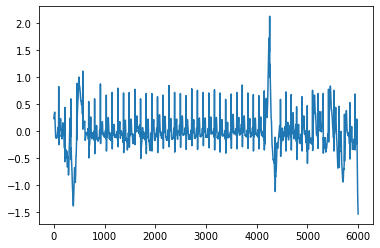

In [83]:
caseid = 83
vals = np.load(f'{file_path}/{caseid}.npz')

plt.plot(vals['ECG'])

In [60]:
rftn = vals['RFTN'][start_idx:end_idx]
tss = 1.57 - np.mean(rftn[~np.isnan(rftn)]) / 3
tss

0.17106666882832844

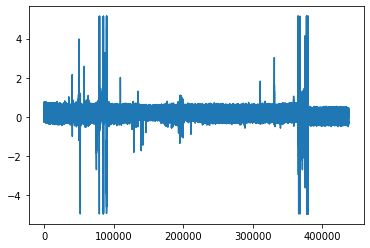

In [22]:
import matplotlib.pyplot as plt

plt.plot(ecg[~np.isnan(ecg)])

In [26]:
import shutil

shutil.copytree('./cranberry/Preprocessing/pyvital2', 'pyvital2')

'pyvital2'

In [94]:
%load_ext autoreload
%autoreload 2

import pre_generator as gen

gen.preprocess(file_path='input_60s', LEN_INPUT = 20, OVERLAP = 10, SRATE = 100)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
###Input 1 / 2684: 5974###
  segment 1...loaded peak...preprocessing done......saved peak...preprocessing done...  segment 2...loaded peak...preprocessing done......saved peak...preprocessing done...  segment 3...loaded peak...preprocessing done......saved peak...preprocessing done...  segment 4...loaded peak...preprocessing done......saved peak...preprocessing done...  segment 5...loaded peak...preprocessing done......saved peak...preprocessing done...###Input 2 / 2684: 801###
  segment 1...loaded peak...preprocessing done......saved peak...preprocessing done...  segment 2...loaded peak...preprocessing done......saved peak...preprocessing done...  segment 3...loaded peak...preprocessing done......saved peak...preprocessing done...  segment 4...loaded peak...preprocessing done......saved peak...preprocessing done...  segment 5...loaded peak...preprocessing done......saved peak...preprocessing done..

/home/painstudy/anaconda3/envs/keras/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/painstudy/anaconda3/envs/keras/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


preprocessing done...  segment 2...saved peak...preprocessing done......saved peak...preprocessing done...  segment 3...saved peak...preprocessing done......saved peak...preprocessing done...  segment 4...saved peak...preprocessing done......saved peak...preprocessing done...  segment 5...saved peak...preprocessing done......saved peak...preprocessing done...###Input 517 / 2684: 2709###
  segment 1...saved peak...preprocessing done......saved peak...preprocessing done...  segment 2...saved peak...preprocessing done......saved peak...preprocessing done...  segment 3...saved peak...preprocessing done......saved peak...preprocessing done...  segment 4...saved peak...preprocessing done......saved peak...preprocessing done...  segment 5...saved peak...preprocessing done......saved peak...preprocessing done...###Input 518 / 2684: 1922###
  segment 1...saved peak...preprocessing done......saved peak...preprocessing done...  segment 2...saved peak...preprocessing done......saved peak...preproc

/home/painstudy/anaconda3/envs/keras/lib/python3.8/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/painstudy/anaconda3/envs/keras/lib/python3.8/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


preprocessing done...  segment 5...saved peak...preprocessing done......saved peak...preprocessing done...###Input 2188 / 2684: 1809###
  segment 1...saved peak...preprocessing done......saved peak...preprocessing done...  segment 2...saved peak...preprocessing done......saved peak...preprocessing done...  segment 3...saved peak...preprocessing done......saved peak...preprocessing done...  segment 4...saved peak...preprocessing done......saved peak...preprocessing done...  segment 5...saved peak...too less peaks
###Input 2189 / 2684: 1592###
  segment 1...saved peak...preprocessing done......saved peak...too less peaks
  segment 2...saved peak...preprocessing done......saved peak...too less peaks
  segment 3...saved peak...preprocessing done......saved peak...preprocessing done...  segment 4...saved peak...preprocessing done......saved peak...too less peaks
  segment 5...saved peak...preprocessing done......saved peak...preprocessing done...###Input 2190 / 2684: 5064###
  segment 1...s

In [95]:
df_preprocess = pickle.load(open('cache/preprocess/df_preprocess', 'rb'))
df_preprocess

,file_path,1,2,3,4,5,6,7,8,9,10
0,5974,"[False, [0.0, 0.0, 0.0], [1.0, 1.0], 0, 0]","[False, [0.0, 0.0, 0.0], [1.0, 1.0], 0, 0]","[False, [0.0, 0.0, 0.0], [0.92, 1.0], 0, 0]","[False, [0.0, 0.0, 0.0], [1.0, 1.0], 0, 0]","[False, [0.0, 0.0, 0.0], [0.9615384615384616, ...","[True, [0.0, 0.0, 0.0], [0.0, 0.03846153846153...","[True, [0.0, 0.0, 0.0], [0.0, 0.04], 0.0341666...","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0.07766666...","[True, [0.0, 0.0, 0.0], [0.038461538461538464,...","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0.17106666..."
1,801,"[False, [0.0, 0.0, 0.0], [1.0, 1.0], 0, 0]","[False, [0.0, 0.0, 0.0], [1.0, 1.0], 0, 0]","[False, [0.0, 0.0, 0.0], [1.0, 1.0], 0, 0]","[False, [0.0, 0.0, 0.0], [1.0, 1.0], 0, 0]","[False, [0.0, 0.0, 0.0], [1.0, 1.0], 0, 0]","[False, [0.0, 0.0, 0.0], [0.03225806451612903,...","[False, [0.0, 0.0, 0.0], [0.03225806451612903,...","[False, [0.0, 0.0, 0.0], [0.09375, 0.892857142...","[False, [0.0, 0.0, 0.0], [0.23333333333333334,...","[False, [0.0, 0.0, 0.0], [0.3103448275862069, ..."
2,2790,"[False, [0.0, 0.0, 0.0], [0.84, 1.0], 0, 0]","[False, [0.0, 0.0, 0.0], [0.92, 1.0], 0, 0]","[False, [0.0, 0.0, 0.0], [0.88, 1.0], 0, 0]","[False, [0.0, 0.0, 0.0], [1.0, 1.0], 0, 0]","[False, [0.0, 0.0, 0.0], [0.8695652173913043, ...","[True, [0.0, 0.0, 0.0], [0.0, 0.04], 0.2393666...","[True, [0.0, 0.0, 0.0], [0.0, 0.08], 0.2391281...","[True, [0.0, 0.0, 0.0], [0.0, 0.08], 0.2395555...","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0.24490474...","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0.25905553..."
3,1413,"[False, [0.0, 0.0, 0.0], [1.0, 1.0], 0, 0]","[False, [0.0, 0.0, 0.0], [1.0, 1.0], 0, 0]","[False, [0.0, 0.0, 0.0], [0.8571428571428571, ...","[False, [0.0, 0.0, 0.0], [1.0, 1.0], 0, 0]","(False, [0.0, 0.0, 0.0], [-2, -2])","[False, [0.0, 0.0, 0.0], [0.18181818181818182,...","[False, [0.0, 0.0, 0.0], [0.5, 0.1739130434782...","[False, [0.0, 0.0, 0.0], [0.42857142857142855,...","[False, [0.0, 0.0, 0.0], [0.5882352941176471, ...",NaN
4,4057,"[False, [0.0, 0.0, 0.0], [1.0, 1.0], 0, 0]","[False, [0.0, 0.0, 0.0], [0.4117647058823529, ...","[False, [0.0, 0.0, 0.0], [1.0, 1.0], 0, 0]","[False, [0.0, 0.0, 0.0], [1.0, 1.0], 0, 0]","[False, [0.0, 0.0, 0.0], [1.0, 1.0], 0, 0]","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 6.37558...","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 6.37552...","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 6.37550...","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 6.37545...","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 6.37535..."
...,...,...,...,...,...,...,...,...,...,...,...
2679,5882,"[False, [0.0, 0.0, 0.0], [0.0, 0.9285714285714...","[False, [0.0, 0.0, 0.0], [0.0, 0.6666666666666...","[False, [0.0, 0.0, 0.0], [0.16666666666666666,...","[False, [0.0, 0.0, 0.0], [0.0, 0.2307692307692...","[True, [0.0, 0.0, 0.0], [0.0, 0.07692307692307...","[False, [0.0, 0.0, 0.0], [0.0, 0.16], 0.254633...","[True, [0.0, 0.0, 0.0], [0.0, 0.08], 0.2714333...","[False, [0.0, 0.0, 0.0], [0.0, 0.1153846153846...","[False, [0.0, 0.0, 0.0], [0.0, 0.52], 0.318633...","[False, [0.0, 0.0, 0.0], [0.045454545454545456..."
2680,927,"[False, [0.0, 0.0, 0.0], [0.0, 0.1666666666666...","[True, [0.0, 0.0, 0.0], [0.0, 0.0625], 0, 0]","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0, 0]","[False, [0.0, 0.0, 0.0], [0.25, 1.0], 0, 0]","[False, [0.0, 0.0, 0.0], [0.7857142857142857, ...","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0.24526190...","[True, [0.0, 0.0, 0.0], [0.0, 0.0], 0.24460714...","[True, [0.0, 0.0, 0.0], [0.07692307692307693, ...","[True, [0.0, 0.0, 0.0], [0.07692307692307693, ...","[True, [0.0, 0.0, 0.0], [0.08333333333333333, ..."
2681,373,"[False, [0.0, 0.0, 0.0], [0.0, 0.8095238095238...","(False, [0.0, 0.0, 0.0], [-2, -2])","[False, [0.0, 0.0, 0.0], [0.0, 0.2631578947368...","[False, [0.0, 0.0, 0.0], [0.0, 0.3684210526315...","[False, [0.0, 0.0, 0.0], [0.0, 0.4210526315789...","[True, [0.0, 0.0, 0.0], [0.03333333333333333, ...",NaN,"[False, [0.0, 0.0, 0.0], [1.0, 0.24], 0, 6.379...","[False, [0.0, 0.0, 0.0], [0.0, 0.1111111111111...","[False, [0.0, 0.0, 0.0], [0.08

In [100]:
ne_pass, e_pass = 0, 0
for _, row in df_preprocess.iterrows():   
    for i in range(0,5):
        if row[str(i+1)][0]:
            ne_pass = ne_pass + 1

    for i in range(5,10):
        if row[str(i+1)][0]:
            e_pass = e_pass + 1
            
print(f'non-event seg pass: {ne_pass/5/2684}, event seg pass: {e_pass/5/2684}')

TypeError: 'float' object is not subscriptable

In [101]:
for _, row in df_preprocess.iterrows():  
    for i in range(5,10):
        print(row[str(6)][0])
    break

True
True
True
True
True
